In [17]:
# Import the necessary modules
import os
os.chdir("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\AP\\Spectral_demixing\\notebooks\\PIPELINE") #change directory to access PIPELINE modules
import Step0_DC_Smax_matrixes as da
import matplotlib.pyplot as plt
from PIL import Image

Image.MAX_IMAGE_PIXELS = None  # Disable the DecompressionBomb warning

# Set the directory paths
directory = 'C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_darkcount_highgain_1image'
experiment_name = 'darkcount_highgain_1image'
output_dir = os.path.join(directory, 'data','241226_Step0_highgain_1image-average_10percentmonotonic')

# Import the darkcount data
darkcount_array, exposure_times = da.import_darkcount_data(directory)

# Sort the data by exposure times
darkcount_array, exposure_times = da.sort_by_exposure_time(darkcount_array, exposure_times)

# Analyze the darkcount data
analysis_results = da.analyze_darkcount_data(darkcount_array, exposure_times)

# Fit curve and find linear range
popt = da.fit_s_curve(exposure_times, analysis_results['mean'])
linear_range = da.find_linear_range(exposure_times, analysis_results['mean'], popt)



print(f"Exposure times: {exposure_times}")
print(f"Mean values: {analysis_results['mean']}")
print(f"Fitted parameters (popt): {popt}")
print(f"Calculated linear range: {linear_range}")

# Generate the PDF report
#da.generate_darkcount_report(darkcount_array, exposure_times, analysis_results, output_dir, experiment_name, popt, linear_range)

# Print fit results
slope, intercept, Smax, smoothness = popt
print(f"Slope of linear part: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Smax: {Smax:.2f}")
print(f"Smoothness: {smoothness:.2f}")
print(f"Linear range: {linear_range[0]:.2f}s to {linear_range[1]:.2f}s")

Shape of darkcount_array: (16, 640, 512)
Shape of exposure_times: (16,)
Exposure times: [1.0000e-03 2.0000e-03 4.0000e-03 8.0000e-03 1.6000e-02 3.2000e-02
 6.4000e-02 1.2800e-01 2.5600e-01 5.1200e-01 1.0240e+00 2.0480e+00
 4.0960e+00 8.1920e+00 1.6384e+01 3.2768e+01]
Mean values: [1110.06228943 1124.1805542  1139.73558044 1156.48858948 1168.67368774
 1185.80007324 1205.88197937 1225.79701233 1263.62889709 1317.11500549
 1421.12732239 1614.373703   1999.38760376 2785.60386047 4150.23678284
 4395.57984314]
Fitted parameters (popt): [2.00226345e+02 1.17496554e+03 4.39661749e+03 2.50085844e-03]
Calculated linear range: (0.001, 16.384)
Slope of linear part: 200.23
Intercept: 1174.97
Smax: 4396.62
Smoothness: 0.00
Linear range: 0.00s to 16.38s


In [18]:

print(popt)
print(exposure_times)

# Generate the PDF report

directory = 'C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_darkcount_highgain_1image'
experiment_name = 'darkcount_highgain_1image'
output_dir = os.path.join(directory)
da.generate_darkcount_report(darkcount_array, exposure_times, analysis_results, directory, experiment_name, popt, linear_range)

[2.00226345e+02 1.17496554e+03 4.39661749e+03 2.50085844e-03]
[1.0000e-03 2.0000e-03 4.0000e-03 8.0000e-03 1.6000e-02 3.2000e-02
 6.4000e-02 1.2800e-01 2.5600e-01 5.1200e-01 1.0240e+00 2.0480e+00
 4.0960e+00 8.1920e+00 1.6384e+01 3.2768e+01]
Starting model_dark_current function
Shape of darkcount_array: (16, 640, 512)
Number of exposure times: 16
Linear range: (0.001, 16.384)
Global popt: [2.00226345e+02 1.17496554e+03 4.39661749e+03 2.50085844e-03]
Processing pixel 0/327680
Processing pixel 10000/327680


C:\Users\apate\OneDrive - Northeastern University\Dennis Lab site\AP\Spectral_demixing\notebooks\PIPELINE\Step0_DC_Smax_matrixes.py:405: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(-smoothness * (linear_term - Smax))


Processing pixel 20000/327680
Processing pixel 30000/327680
Processing pixel 40000/327680
Processing pixel 50000/327680
Processing pixel 60000/327680
Processing pixel 70000/327680
Processing pixel 80000/327680
Processing pixel 90000/327680
Processing pixel 100000/327680
Processing pixel 110000/327680
Processing pixel 120000/327680
Processing pixel 130000/327680
Processing pixel 140000/327680
Processing pixel 150000/327680
Processing pixel 160000/327680
Processing pixel 170000/327680
Processing pixel 180000/327680
Processing pixel 190000/327680
Processing pixel 200000/327680
Processing pixel 210000/327680
Processing pixel 220000/327680
Processing pixel 230000/327680
Processing pixel 240000/327680
Processing pixel 250000/327680
Processing pixel 260000/327680
Processing pixel 270000/327680
Processing pixel 280000/327680
Processing pixel 290000/327680
Processing pixel 300000/327680
Processing pixel 310000/327680
Processing pixel 320000/327680
Finished processing all pixels
Total non-monoto

In [5]:
# Import the necessary modules
import os
os.chdir("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\AP\\Spectral_demixing\\notebooks\\PIPELINE") #change directory to access PIPELINE modules
import Step0_DC_Smax_matrixes as da
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


#Analyzing saturation data

directory = 'C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_reflectance_highgain - Copy'

#Import .h5 data in directory
reflectance_array, exposure_times = da.import_reflectance_data(directory)

print('reflectance array shape', reflectance_array.shape)

#Determine saturation response
Slinear, Smax, fit_params, fit_quality = da.analyze_light_response(reflectance_array, exposure_times)









Loaded 15 files
Shape of reflectance_array: (15, 640, 512)
Shape of exposure_times: (15,)
Exposure time range: 1.00e-03 to 1.64e+01 seconds
reflectance array shape (15, 640, 512)


In [8]:
import pickle
os.chdir(directory)
np.save('Slinear.npy', Slinear)
np.save('Smax.npy', Smax)

with open('fit_params.pkl', 'wb') as file:
    pickle.dump(fit_params, file)

with open('fit_quality.pkl', 'wb') as file:
    pickle.dump(fit_quality, file)


Loaded 15 files
Shape of reflectance_array: (15, 640, 512)
Shape of exposure_times: (15,)
Exposure time range: 1.00e-03 to 1.64e+01 seconds


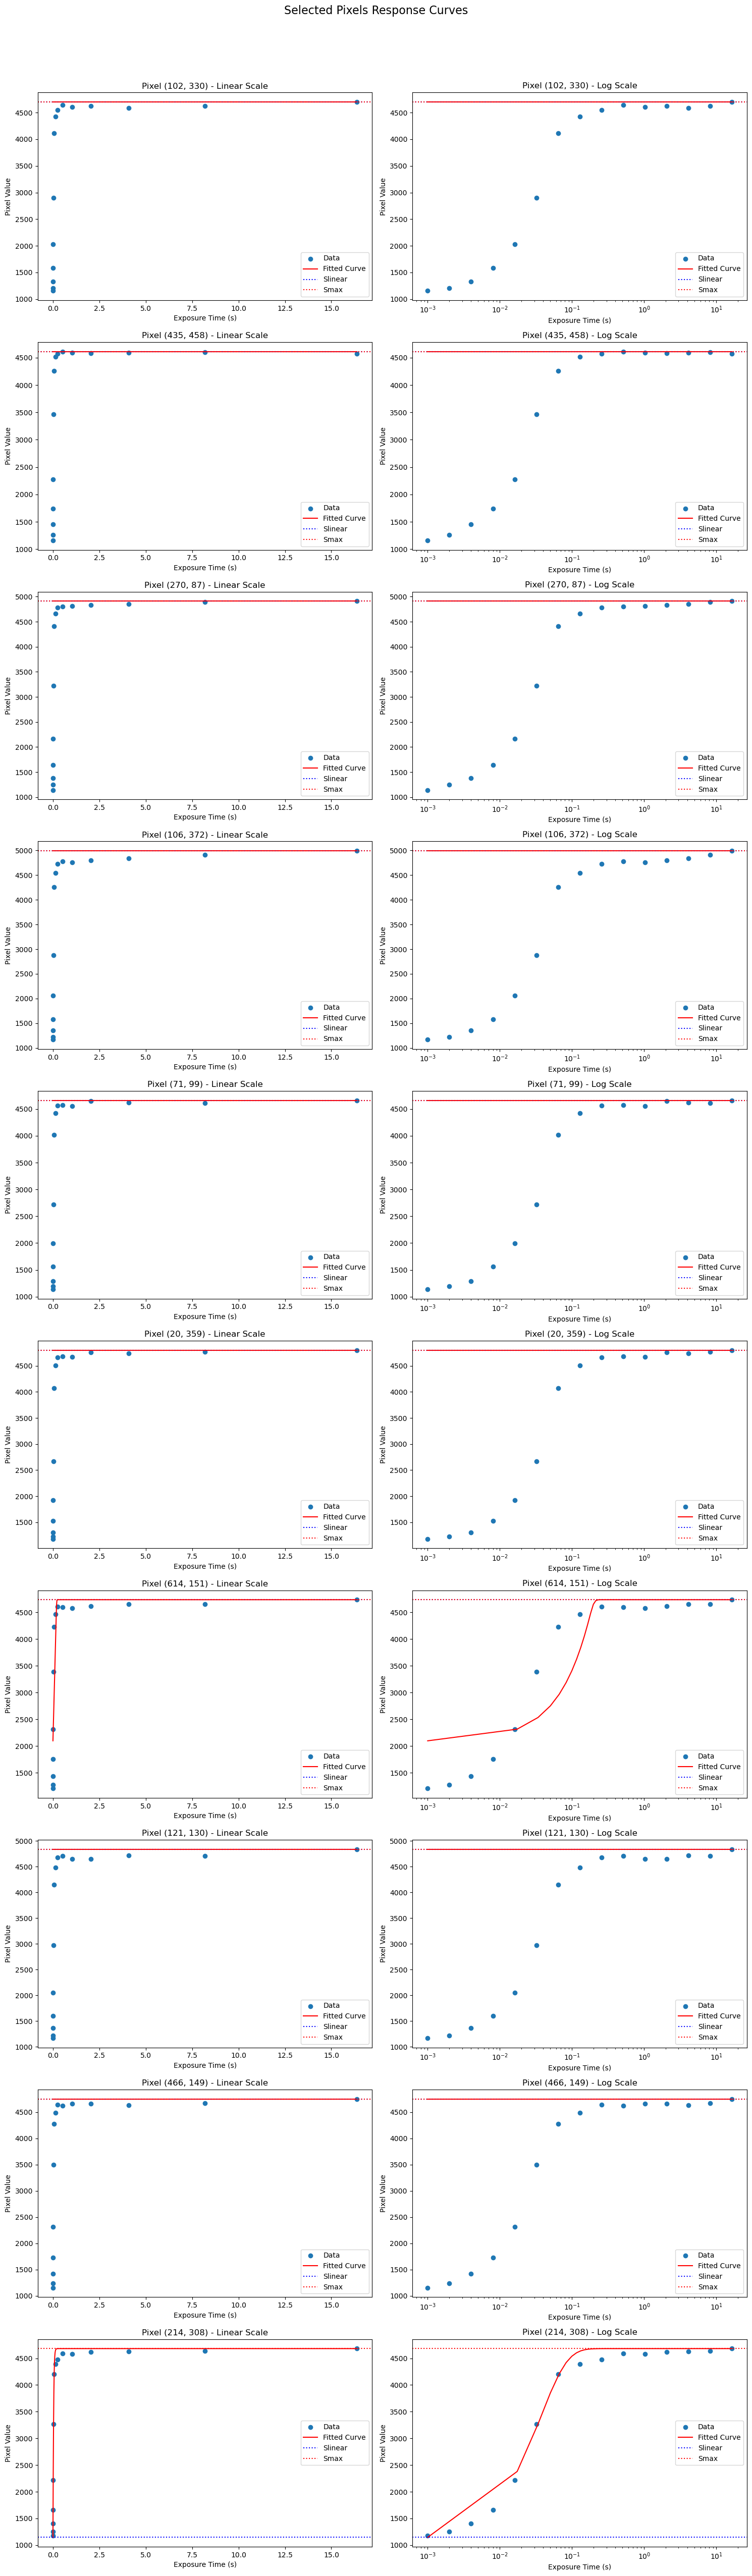

In [2]:
import os
os.chdir("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\AP\\Spectral_demixing\\notebooks\\PIPELINE") #change directory to access PIPELINE modules
import Step0_DC_Smax_matrixes as da
import matplotlib.pyplot as plt
import numpy as np
import pickle

directory = 'C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_reflectance_highgain - Copy'


#Import pickled data

os.chdir(directory)
Slinear = np.load('Slinear.npy')
Smax = np.load('Smax.npy')
unpickled = pickle.load(open('fit_params.pkl', 'rb'))
fit_params = unpickled
unpickled = pickle.load(open('fit_quality.pkl', 'rb'))
fit_quality = unpickled

#Import .h5 data in directory
reflectance_array, exposure_times = da.import_reflectance_data(directory)

#select 10 random pixels
height, width = reflectance_array.shape[1:]
pixel_coords = da.select_random_pixels(height, width, n_pixels=10, seed=42)

# Plot those pixels
fig = da.plot_pixel_responses(reflectance_array, exposure_times, pixel_coords, 
                         Slinear, Smax, fit_params)
plt.show()

In [4]:
def debug_fit_params(fit_params, i, j):
    """
    Debug the fit_params structure and indexing.
    """
    print("\nDEBUG OUTPUT:")
    print(f"Pixel coordinates: i={i} ({type(i)}), j={j} ({type(j)})")
    
    print("\nfit_params structure:")
    for key in fit_params:
        param = fit_params[key]
        print(f"\nParameter: {key}")
        print(f"Type: {type(param)}")
        if hasattr(param, 'dtype'):
            print(f"dtype: {param.dtype}")
        if hasattr(param, 'shape'):
            print(f"shape: {param.shape}")
        
        # Try to access the value different ways
        try:
            print(f"\nTrying different access methods for {key}:")
            print(f"1. Direct indexing type: {type(param[i, j])}")
            print(f"2. Integer conversion: {type(param[int(i), int(j)])}")
            converted = np.array(param, dtype=np.float64)
            print(f"3. After numpy conversion: {type(converted[int(i), int(j)])}")
        except Exception as e:
            print(f"Error accessing {key}: {str(e)}")

debug_fit_params(fit_params, 310, 110)


DEBUG OUTPUT:
Pixel coordinates: i=310 (<class 'int'>), j=110 (<class 'int'>)

fit_params structure:


TypeError: iteration over a 0-d array

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

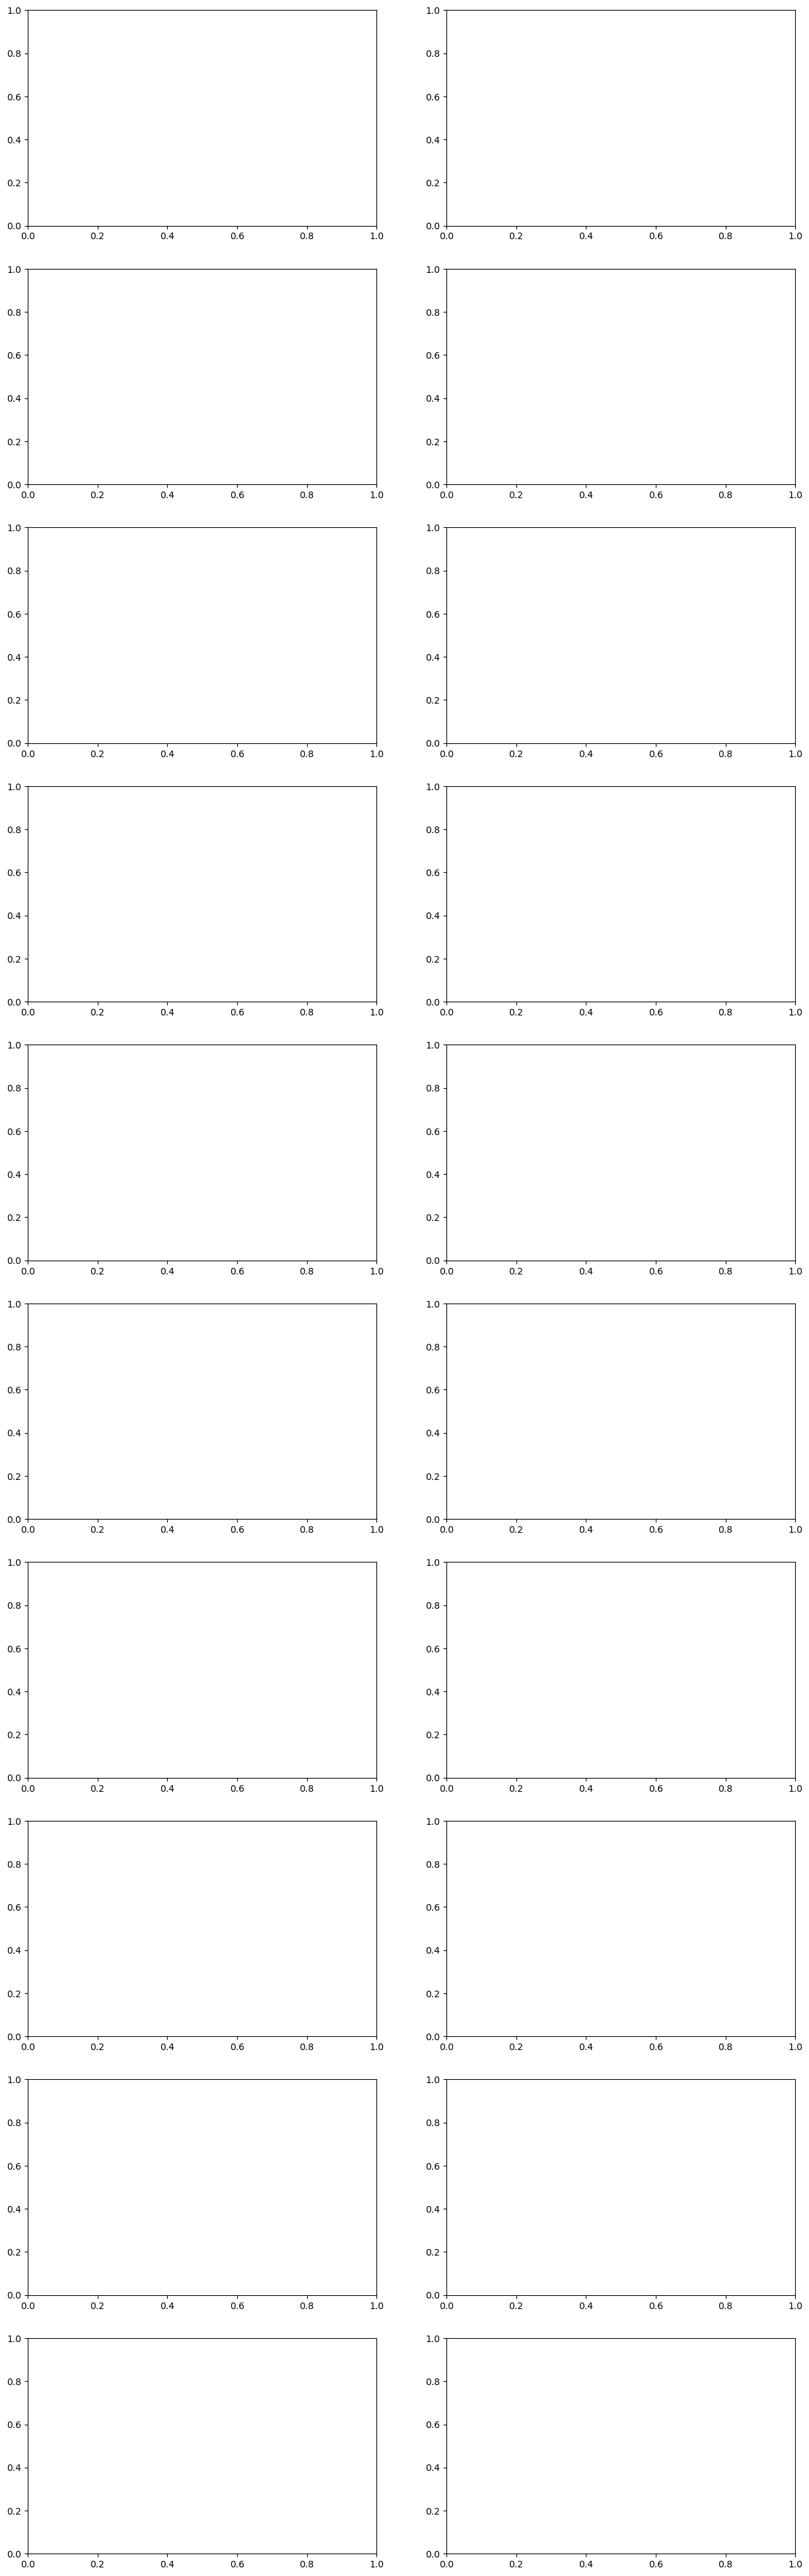

In [11]:
#plot a set of response curves for different pixels
n_pixels = 10

height, width = reflectance_array.shape[1:]

i_coords = np.random.randint(0, height, n_pixels)
j_coords = np.random.randint(0, width, n_pixels)
    
list(zip(i_coords, j_coords))

pixel_response = da.plot_pixel_responses(reflectance_array, exposure_times, pixel_coords, 
                        Slinear, Smax, fit_params)

#Make saturation heatmap to determine agreement between pixels and between fitting methods

fit_map = da.plot_saturation_maps(Slinear, Smax, fit_quality)

In [ ]:
#Generate report

experiment_name = 

reflectance_report = da.generate_light_response_report(reflectance_array, exposure_times, directory, 
                                 experiment_name)